## Example of generating contour plots from random data.

I'll start with a random set of points, with a distribution I know so that I can understand what the contours are enclosing, later. 

First let's set it up! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Here's our data - x and y.
sigma = 1.0
mu1 = 0.
mu2 = 10.0
samplesize = 2500000
x = sigma * np.random.randn(samplesize) + mu1
y = sigma * np.random.randn(samplesize) + mu2

In [3]:
def gauss_func(x, sigma, mu):
    return(1 / sigma / np.sqrt(2 * np.pi) *  np.exp(-.5 * (x - mu)**2 / sigma**2))
def gauss_func_2d(x, y, sigma, mu1, mu2):
    return(1 / sigma**2 / 2 / np.pi * np.exp ( -.5 * ((x-mu1)**2 + (y - mu2)**2 / sigma**2)))

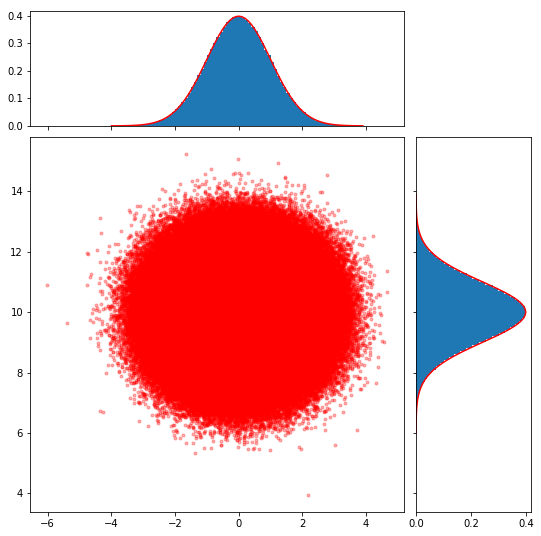

In [4]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx, sharex=axScatter)
axHisty = plt.axes(rect_histy, sharey=axScatter)

# the scatter plot:
axScatter.plot(x, y, 'r.', alpha=0.3)

# histograms
binsize = 0.1
xbins = np.arange(-4*sigma, 4*sigma, binsize) + mu1
n, b, p = axHistx.hist(x, bins=xbins, normed=True)
ybins = np.arange(-4*sigma, 4*sigma, binsize) + mu2
n, b, p = axHisty.hist(y, bins=ybins, orientation='horizontal', normed=True)

# add a line
axHistx.plot(xbins, gauss_func(xbins, sigma, mu1), 'r-')
axHisty.plot(gauss_func(ybins, sigma, mu2), ybins, 'r-')

plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
         visible=False)
plt.show()

To make contours, you need to know the density of the points in bins over the space - we can use numpy histogram2d to do this. Then we can make a contour plot from the histogram data, but we do need to do some work to understand what the contours mean.

In [5]:
# Histogram the data.
binsize = .5
xbins = np.arange(-4*sigma, 4*sigma, binsize) + mu1
ybins = np.arange(-4*sigma, 4*sigma, binsize) + mu2
# H is the histogram - normalized to have a sum = 1 / area_bin
H, bx, by = np.histogram2d(x, y, bins=[xbins, ybins], normed=True)
binarea = binsize * binsize
peak = gauss_func_2d(mu1, mu2, sigma, mu1, mu2)
print(H.max(), peak, binarea, H.sum()*binarea)

0.146832286006 0.159154943092 0.25 1.0


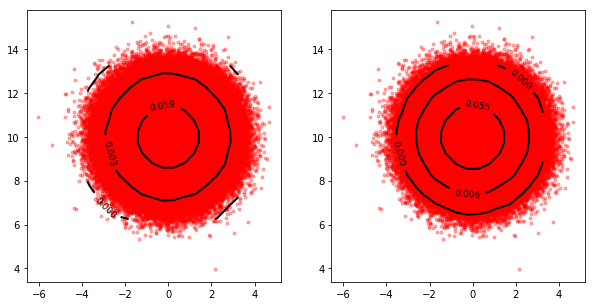

In [6]:
# Contours, with level values that correspond to values of the histogram.
# We'll make them 1/2/3 sigma contours.
# The definition of "1/2/3 sigma" is .. interesting .. here. 
# A contour at a distance calculated by 3 sigma will enclose 99.99% of a 2-d gaussian population.
# However, we usually mean "3 sigma confidence level" of a 1-d gaussian -- i.e. encloses 99.73% of the population.
# Want to see the difference? 
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(x, y, 'r.', alpha=0.3, zorder=0)
pops = [3., 2., 1.]
lvls = []
for p in pops:
    val = gauss_func_2d((mu1 + p *sigma), (mu2 + p * sigma), sigma, mu1, mu2)
    lvls.append(val)
CS = plt.contour(H.transpose(), origin='lower', extent=[xbins.min(), xbins.max(), ybins.min(), ybins.max()], 
                 levels=lvls, colors='k', linewidths=2, zorder=10)
l = plt.clabel(CS, inline=1, fontsize=9)

# Contours with level values that correspond to the equivalent enclosed amount of the population.
# So we can see - this works.
plt.subplot(122)
hvals = np.sort(np.ravel(H))
cumulative_pop = hvals.cumsum()*binarea
pops = [99.73, 95.44, 68.26]
#pops = [99.99, 98.38, 60.68] # equivalent contours to above.
lvls = []
for p in pops:
    idx = np.where(np.abs(cumulative_pop - (1-p/100.)) == np.abs(cumulative_pop - (1-p/100.)).min())
    idx = idx[0] - 1
    lvls.append(hvals[idx])
lvls = np.array(lvls)

plt.plot(x, y, 'r.', alpha=0.3, zorder=0)
CS = plt.contour(H.transpose(), origin='lower', extent=[xbins.min(), xbins.max(), ybins.min(), ybins.max()], 
                 levels=lvls, colors='k', linewidths=2, zorder=10)
l = plt.clabel(CS, inline=1, fontsize=9)

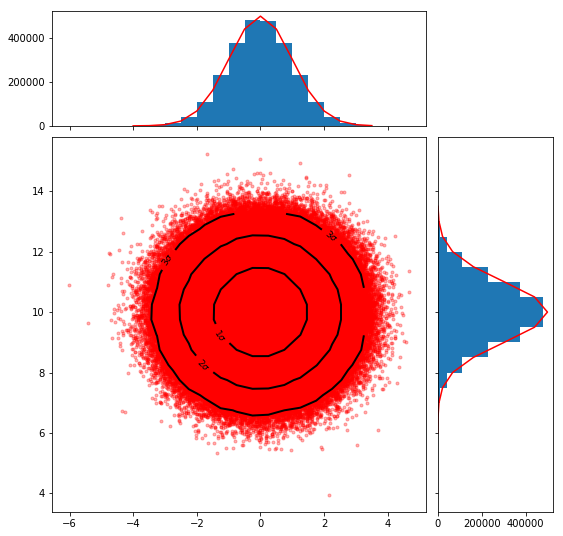

In [7]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx, sharex=axScatter)
axHisty = plt.axes(rect_histy, sharey=axScatter)

# Create histogram
binsize = .5
xbins = np.arange(-4*sigma, 4*sigma, binsize) + mu1
ybins = np.arange(-4*sigma, 4*sigma, binsize) + mu2
H, bx, by = np.histogram2d(x, y, bins=[xbins, ybins], normed=True)

# Figure out the levels
hvals = np.sort(np.ravel(H))
cumulative_pop = hvals.cumsum()*binarea
pops = [99.73, 95.44, 68.26]
#pops = [99.99, 98.38, 60.68]
popstr = ['$3\sigma$', '$2\sigma$', '$1\sigma$']
lvls = []
for p in pops:
    idx = np.where(np.abs(cumulative_pop - (1-p/100.)) == np.abs(cumulative_pop - (1-p/100.)).min())
    lvls.append(hvals[idx][0])
lvls = np.array(lvls)

fmtstring = {}
for l, p in zip(lvls, popstr):
    fmtstring[l] = p
#print(lvls, fmtstring)

# the scatter plot:
axScatter.plot(x, y, 'r.', alpha=0.3, zorder=0)
CS = axScatter.contour(H.transpose(), origin='lower', extent=[xbins.min(), xbins.max(), ybins.min(), ybins.max()], 
                 levels=lvls, colors='k', linewidths=2, zorder=10)
axScatter.clabel(CS, inline=1, fontsize=9, fmt=fmtstring)

# histograms
n, b, p = axHistx.hist(x, bins=xbins)
n, b, p = axHisty.hist(y, bins=ybins, orientation='horizontal')

# add a line
peak = samplesize * binsize
axHistx.plot(xbins, gauss_func(xbins, sigma, mu1) * peak, 'r-')
axHisty.plot(gauss_func(ybins, sigma, mu2) * peak, ybins, 'r-')

plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
         visible=False)
plt.show()

In [8]:
# I just learned you can do a variation on this with astroML as well! (pip installable)
from astroML import plotting

([<matplotlib.lines.Line2D at 0x119941ba8>],
 <matplotlib.contour.QuadContourSet at 0x119941710>)

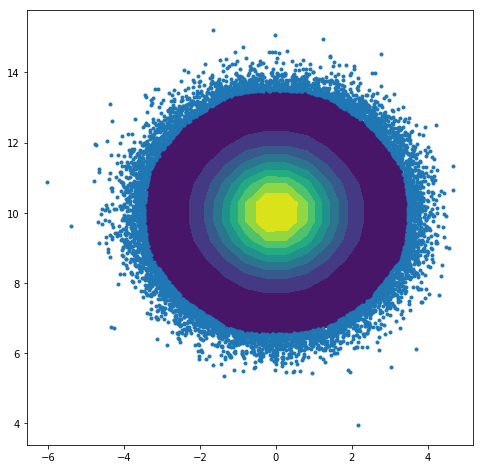

In [10]:
plt.figure(figsize=(8, 8))
plotting.scatter_contour(x, y, threshold=600, histogram2d_args={'bins':[xbins, ybins]})